IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ryan Ohouens
Sarah Saleh

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation


Décompresser l'archive, elle crée le répertoire "tme8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

## Visualisation des données

Lorsque les données sur lesquelles on travaille possèdent plus de 2 dimensions, il est impossible de les visualiser simplement comme on a pu le faire dans les séances précédentes.

Une façon de mieux visualiser ces données et alors d'utiliser les outils d'un package de visualisation.

Le package <code>seaborn</code> est très pratique (vous pouvez consulter la documentation sur le web) et généralement installé dans l'environnement Python.

Nous utilisons ici la fonction <code>pairplot</code> de ce package. Cette fonction permet d'afficher les corrélations des dimensions prises 2 à 2.




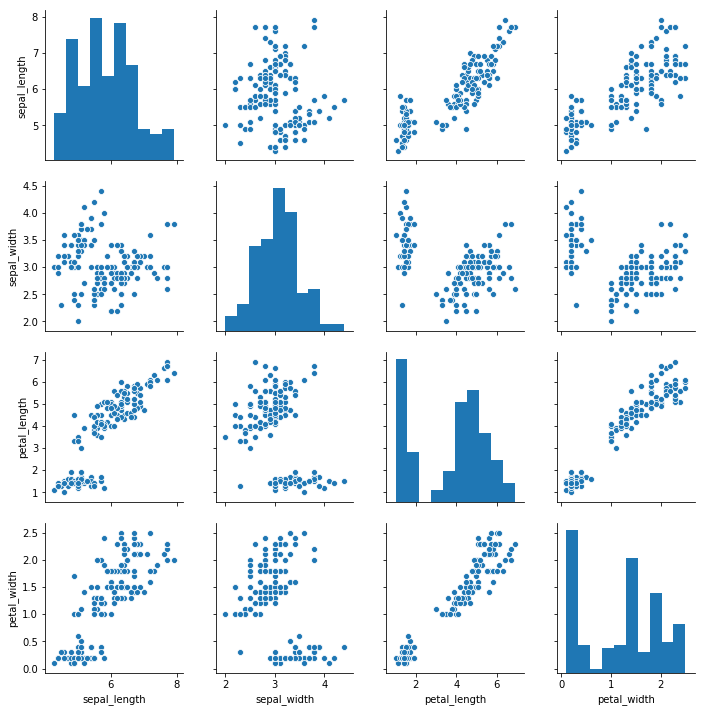

In [2]:
# Importation du package seaborn:
import seaborn as sns


# On créé un dataframe df. 
# Par exemple :
df = sns.load_dataset('iris')

# on utilise ici une fonction particulière de seaborn pour charger les données des Iris de Fischer


# A partir de df, on construit l'ensemble des corrélations des dimensions prises 2 à 2:
sns.pairplot(df)

# Eventuellement, mais pas nécessairement utile:
#sns.plt.show()


### Chargement du fichier "base_2D.csv"

In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


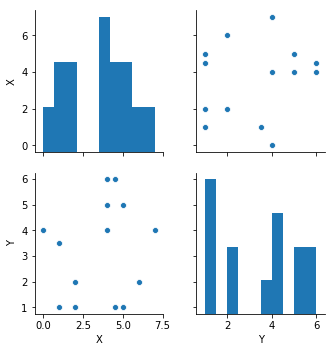

In [4]:
# Affichage des corrélations:
sns.pairplot(data_2D)


Dans la suite, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Mise à jour de votre librairie IADS

<font color="RED" size="+1">**[Q]**</font> Dans un premier temps, rajoutez les fonctions écrites lors de la séance précédentes dans le fichier <code>kmoyennes.py</code> qui sera placé dans le répertoire <code>iads</code> de votre package de fonction 3i026. (pour mémoire, vous pouvez retourner voir le sujet des séances 3 à 5).


Pour cela, reprenez le fichier <code>kmoyennes.py</code> qui se trouve dans le répertoire <code>tme09</code> de cette séance, placez le dans le répertoire <code>iads</code> et complétez-le en reprenant les fonctions que vous avez écrites dans la séance précédente.



Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en l'important:

In [5]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
# importation de utils
from iads import kmoyennes as km


## Travail à réaliser

<font color="RED" size="+1">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> avec les données jouets de <code>data_2D</code> (une fois normalisées).

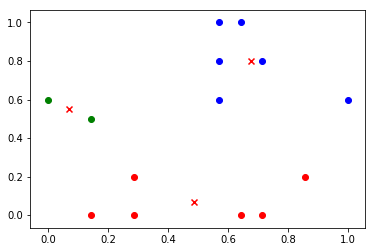

In [6]:
# Normalisation:
data_2Dnorm = km.normalisation(data_2D)

# Essai avec k=3:
les_centres, l_affectation = km.kmoyennes(3, data_2Dnorm, 0.05, 100)

# Affichage du résultat:
km.affiche_resultat(data_2Dnorm,les_centres,l_affectation)

Utiliser les fonctions écrites dans les séances sur l'apprentissage supervisé (<code>createGaussianDataset</code>) pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

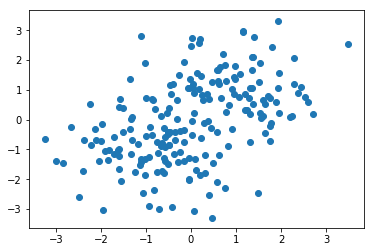

In [7]:
# Utilisation de cette fonction :
the_set = ut.createGaussianDataset(np.array([1,1]) ,np.array([[1,0],[0,1]]), \
                                   np.array([-1,-1]),np.array([[1,0],[0,1]]), 100)

# Transformation du labeledSet en DataFrame: (on sait qu'il n'y a que 2 dimensions)
les_X0 = []
les_X1 = []
for i in range(0,the_set.size()):
    les_X0.append(the_set.getX(i)[0])
    les_X1.append(the_set.getX(i)[1])

# Affichage des points obtenus
data_random = pd.DataFrame({'X':les_X0, 'Y':les_X1})
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

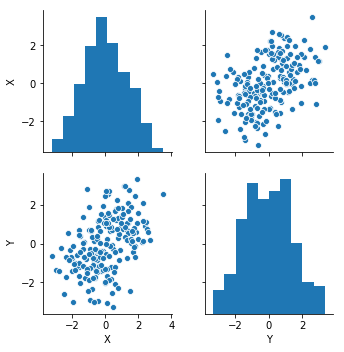

In [8]:
# Affichage des corrélations:

sns.pairplot(data_random)


<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

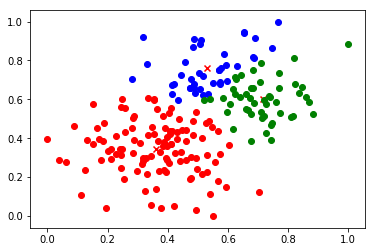

In [9]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

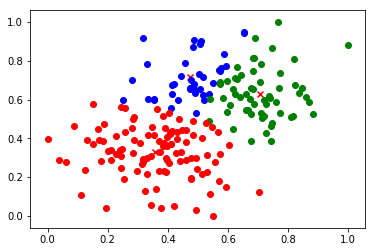

In [10]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

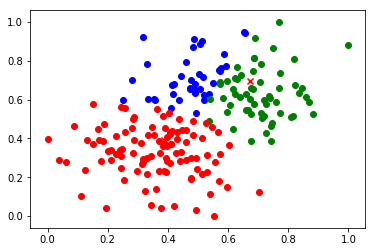

In [11]:
les_centresRand1, l_affectationv = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

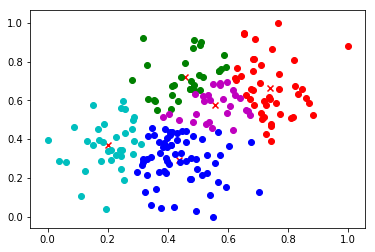

In [12]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

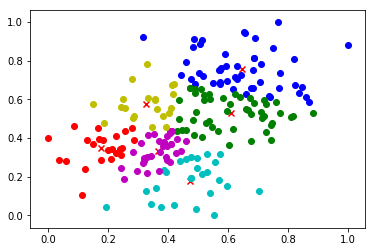

In [13]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [30]:
def dist_intracluster(exemple):
    if len(exemple) < 2:
        return 0.0
    maxi= km.dist_vect(exemple.iloc[0], exemple.iloc[1])
    for i in range(len(exemple)) :
        for j in range(i+1,len(exemple)):
            d = km.dist_vect(exemple.iloc[i], exemple.iloc[j])
            if d > maxi :
                maxi = d
    return maxi

In [31]:
# Exemple avec les données précédentes: 
for k in range(0,len(l_affectationRand1)):
    DF = DataRandom.iloc[l_affectationRand1[k]]
    print('cluster' + str(k)+": inertie = " + str(km.inertie_cluster(DF)) + "\tintra = "+  str(dist_intracluster(DF)))


cluster0: inertie = 1.3770721684124112	intra = 0.5011948393461685
cluster1: inertie = 0.5454151838588712	intra = 0.38319014482217195
cluster2: inertie = 1.2003305164685216	intra = 0.6117949672224761
cluster3: inertie = 0.724421675591804	intra = 0.5617907437132036
cluster4: inertie = 0.29425267320725057	intra = 0.2925965078860678


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [32]:
def global_intraclusters(exemple, di):
    ke = list(di.keys())
    maxi = dist_intracluster(exemple.iloc[di[ke[0]]])
    for i in ke :
        df = exemple.iloc[di[i]]
        m = dist_intracluster(df)
        if m > maxi :
            maxi = m
    return maxi

In [33]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.2931183504097598
Données aléatoire: 0.683442552712711
Avec l'inertie :
Données jouet: 0.14877551020408167
Données aléatoire: 3.6701016494333496


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [18]:
def sep_clusters(ens):
    mini = km.dist_vect(ens.iloc[0], ens.iloc[1])
    for i in range(len(ens)) :
        for j in range(i+1, len(ens)):
            m = km.dist_vect(ens.iloc[i], ens.iloc[j])
            if mini > m :
                mini = m
    return mini

In [19]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.638139657302555


In [20]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.1859271503553543


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [21]:
def evaluation(chaine, exemple, centres, aff):
    se = sep_clusters(centres)
    if chaine =="Dunn":
        global_intra = global_intraclusters(exemple, aff)
        return global_intra / se
    iner = km.inertie_globale(exemple,aff)
    return iner / se

In [22]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",data_2Dnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",data_2Dnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	1.162374754912464
	XB:	1.2242751166786523
Pour les données aléatoires (6 clusters):
	Dunn:	3.6758620320188724
	XB:	19.739460549031424
Pour les données aléatoires (5 clusters):
	Dunn:	3.479206234965386
	XB:	23.552180578958613


<font size="+1" color="RED">**[Q]**</font> Afficher le résultat de chaque clustering sur les données en indiquant les valeurs des indices de Dunn et de Xie & Beni. Quelles conclusions pouvez-vous en tirer?

On peut en déduire que l'indice de Dunn minimise le resultat du 
clustering par rapport à l'indice de Xie et Beni.

## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

{0: [0, 1, 2, 3, 4, 8], 1: [5, 6, 7, 9, 10, 11, 12, 13]}
Pour k = 2 1.6515856317601805
{0: [5, 6, 7, 9, 11], 1: [0, 1, 2, 3, 4], 2: [8, 10, 12, 13]}
Pour k = 3 1.0996318242123055
{0: [5, 11, 12, 13], 1: [2, 3, 4], 2: [8, 10], 3: [0, 1, 6, 7, 9]}
Pour k = 4 1.699562997366103
{0: [13], 1: [5, 6, 11], 2: [2, 3, 4, 8, 10, 12], 3: [0, 1], 4: [7, 9]}
Pour k = 5 2.7788226568857386
{0: [3, 8, 10, 12], 1: [13], 2: [7, 9], 3: [6, 11], 4: [0, 1, 2, 4], 5: [5]}
Pour k = 6 3.0358386716111005
{0: [2, 3, 4], 1: [0, 1], 2: [13], 3: [6, 7], 4: [9, 11], 5: [5], 6: [8, 10, 12]}
Pour k = 7 2.73577127049109
{0: [6, 11], 1: [0, 1], 2: [7, 9], 3: [2, 3, 4], 4: [10], 5: [12, 13], 6: [5], 7: [8]}
Pour k = 8 5.946427498927405
{0: [6, 7], 1: [3], 2: [0, 1], 3: [9, 11], 4: [4], 5: [12, 13], 6: [5], 7: [2], 8: [8, 10]}
Pour k = 9 3.9642849992849323
{0: [8, 10, 12], 1: [13], 2: [0], 3: [9], 4: [1], 5: [11], 6: [7], 7: [2, 3, 4], 8: [5], 9: [6]}
Pour k = 10 4.103656905736632


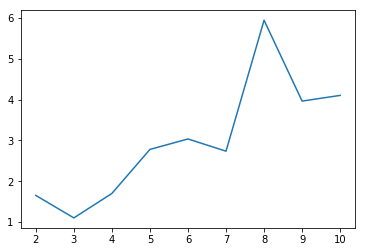

Pour k = 2 2.983362864254814
Pour k = 3 1.7904003381740339
Pour k = 4 1.4331835879005692
Pour k = 5 0.9139985242637734
Pour k = 6 1.5219183475832891
Pour k = 7 1.008435483115105
Pour k = 8 0.5242042987499835
Pour k = 9 0.5490476190476191
Pour k = 10 0.9923809523809513


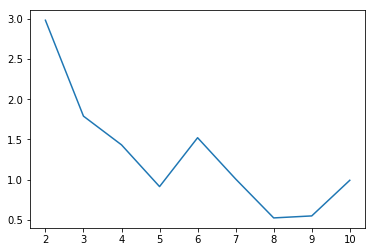

In [39]:
#Pour Dunn :
les_centres, l_affectation = km.kmoyennes(2, data_2Dnorm, 0.05, 100)
mini = evaluation("Dunn",data_2Dnorm,les_centres,l_affectation)
indice = 2
x = []
y = []
for k in range(2,11):
    #print(data_2Dnorm)
    les_centres, l_affectation = km.kmoyennes(k, data_2Dnorm, 0.05, 100)
    print(l_affectation)
    m = evaluation("Dunn",data_2Dnorm,les_centres,l_affectation)
    print("Pour k =",k, m)
    if mini > m :
        mini = m 
        indice = k
    x.append(k)
    y.append(m)
plt.plot(x, y) 
plt.show()
#Pour XB :
les_centres, l_affectation = km.kmoyennes(2, data_2Dnorm, 0.05, 100)
mini = evaluation("XB",data_2Dnorm,les_centres,l_affectation)
indice = 2
x2 = []
y2 = []
for k in range(2,11):
    les_centres, l_affectation = km.kmoyennes(k, data_2Dnorm, 0.05, 100)
    m = evaluation("XB",data_2Dnorm,les_centres,l_affectation)
    print("Pour k =",k, m)
    if mini > m :
        mini = m 
        indice = k
    x2.append(k)
    y2.append(m)
    
plt.plot(x2, y2)
plt.show()

On voit que des minimums locaux apparaissent par exemple pour Dunn, ils sont aux alentours de 3 et 7 et pour XB, ils sont aux alentours de 
5 et 9. On arrive mieux à déterminer la valeur optimale de clusters.

In [ ]:
the_set = ut.createGaussianDataset(np.array([1,1]) ,np.array([[1,0],[0,1]]), \
                                   np.array([-1,-1]),np.array([[1,0],[0,1]]), 100)


## Préparation pour le projet

Le temps restant de la séance est consacré au projet.

